# <center><u>Option Pricing under a Non-Parametric Distribution</u></center>

### <u>Introduction</u>

The price of a European Call option, under the risk-neutral measure $Q$, is given as:<br><br>
<center>
$
{\mathbb{E}^{Q}}[e^{-rT}(S_{T}-K)^{+}] = \int_{0}^{\infty} (1 - F_{S_T}(x))\mathrm{d}x
$
</center>
<br>
where, <br>
$r$ is the risk-free rate of interest <br>
$T$ is the time to maturity of the option <br>
$S_T$ is the price of the underlying at maturity <br>
$K$ is the strike price of the option <br>
$F_{S_T}(\cdot)$ is the CDF of $S_T$ under the risk neutral measure <br>
<br>

If $S_0$ is considered to be the intial price of the underlying, then the above formula can be written as:<br><br>
<center>
$
S_0e^{-rT}{\mathbb{E}^{Q}}[(\frac{S_{T}}{S_0}-\frac{K}{S_0})] = S_0e^{-rT}\int_{K/S_0}^{\infty} (1 - F_{S_T/S_0}(x))\mathrm{d}x
$
</center><br>

Most option pricing models assume a parameterized distribution for the prices of the underlying, and use it for pricing the options. However, the assumed distribution may not accurately model the price movements of the underlying, and hence, result in anamalous option prices.

Following sections present a methodology to price options using a non-parametric distribution. 
It will be shown that we can empirically estimate $F_{S_T/S_0}(\cdot)$, the CDF of $S_T/S_0$, using data obtained from the market.


### <u>Methodology</u>

The PDF and CDF of a standard normal distribution is given as: 

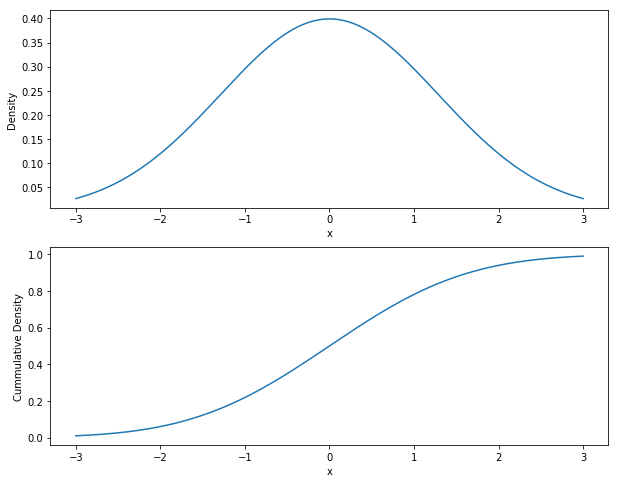

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
a = 0
x = np.linspace(stats.skewnorm.ppf(0.01, a),stats.skewnorm.ppf(0.99, a), 1000)

x_axis = np.linspace(-3,3,1000)
plt.rcParams['figure.figsize'] = [10,8]

plt.subplot(211)
plt.plot(x_axis,stats.skewnorm.pdf(x, a))
plt.xlabel('x');
plt.ylabel('Density');

plt.subplot(212)
plt.plot(x_axis, stats.skewnorm.cdf(x, a))
plt.xlabel('x');
plt.ylabel('Cummulative Density');

The curve for the CDF of a distribution can be modelled using a logistic function. 
A generalized logistic function is given as:<br><br>
<center>
$
f(x) = A + \frac{K-A}{(C+Qe^{-B(x-M)})^{1/\nu}}
$
</center><br>
where,<br>
$A$ is the lower asymptote<br>
$K$ is the upper asymptote<br>
$B$ is the growth rate<br>
$\nu > 0$ affects near which asymptote maximum growth occurs<br>
$Q$ is related to the value $f(0)$<br>
$C$ mostly takes a value of 1<br>
$M$ can be considered to be the starting time<br>
<br>

Using $\;A = 0; K = 1; B = 2; \nu = 0.5; Q = 1; C = 1 \; and \; M = 1$, we can approximately model the CDF of a standard normal distribution as shown below.

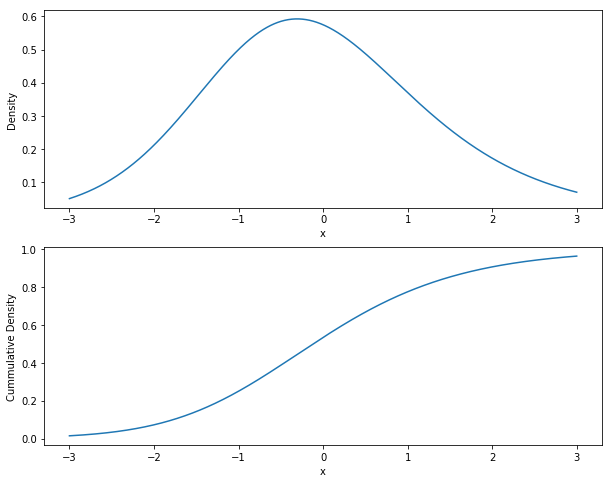

In [90]:
x = np.linspace(0, 3, 1000)
Q, B, nu = (1, 2, 0.5)
cdf = 1/((1+Q*(np.exp(-B*(x-1))))**(1/nu))
pdf = (-1/nu)*((1+Q*np.exp(-B*(x-1)))**((-1/nu)-1))*(-Q*B)*np.exp(-B*(x-1))

x_axis = np.linspace(-3,3,1000)
plt.rcParams['figure.figsize'] = [10,8]

plt.subplot(211)
plt.plot(x_axis, pdf);
plt.xlabel('x');
plt.ylabel('Density');

plt.subplot(212)
plt.plot(x_axis, cdf);
plt.xlabel('x');
plt.ylabel('Cummulative Density');

The logistic function selected for modelling the CDF is as follows:
<center>
$
f(x) = \frac{1}{(1+Qe^{-B(x-1)})^{1/\nu}}
$
</center><br>

where $Q, B \; and \; \nu$ are parameters calibrated using market data.

### <u>Calibration Code</u>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sop
from scipy.integrate import quad

import warnings
warnings.filterwarnings('ignore')

r = 0.005

optData = pd.read_csv('..'+os.sep+'data'+os.sep+'projectData.csv')
optData['Date'] = pd.to_datetime(optData['Date'], format='%Y-%m-%d')
optData['Maturity'] = pd.to_datetime(optData['Maturity'], format='%Y-%m-%d')
dates = list(optData['Date'].drop_duplicates())
expiries = sorted(list(optData['Maturity'].drop_duplicates()))

filtData = optData[(optData['Date'] == dates[0]) & (optData['Maturity'] == expiries[0])]
S0 = filtData['Underlying'].iloc[0]

print(filtData)

         Date  Underlying  Strike   Maturity    Bid    Ask   Call
0  2019-04-15     2905.58    2845 2019-04-30  68.60  70.20  69.40
1  2019-04-15     2905.58    2850 2019-04-30  64.20  65.80  65.00
2  2019-04-15     2905.58    2855 2019-04-30  59.90  61.40  60.65
3  2019-04-15     2905.58    2860 2019-04-30  55.60  57.10  56.35
4  2019-04-15     2905.58    2865 2019-04-30  51.40  52.90  52.15
5  2019-04-15     2905.58    2870 2019-04-30  47.80  48.30  48.05
6  2019-04-15     2905.58    2875 2019-04-30  43.70  44.20  43.95
7  2019-04-15     2905.58    2880 2019-04-30  39.80  40.30  40.05
8  2019-04-15     2905.58    2885 2019-04-30  36.00  36.40  36.20
9  2019-04-15     2905.58    2890 2019-04-30  32.30  32.80  32.55
10 2019-04-15     2905.58    2895 2019-04-30  28.80  29.30  29.05
11 2019-04-15     2905.58    2900 2019-04-30  25.50  25.90  25.70
12 2019-04-15     2905.58    2905 2019-04-30  22.30  22.80  22.55
13 2019-04-15     2905.58    2910 2019-04-30  19.40  19.80  19.60
14 2019-04

In [88]:
def find_cdf(x, Q, B, nu):
    v=1/((1+Q*(np.exp(-B*(x-1))))**(1/nu))
    return 1-v

def find_call_value(S0, K, r, T, p0):
    Q, B, nu = p0
    func = lambda x: find_cdf(x, Q, B, nu)
    p = quad(func, K/S0, np.inf)
    return S0*np.exp(-r*T)*p[0]

def error_func(p0):
    global i, min_RMSE
    se = []
    for row, option in filtData.iterrows():
        T = (option['Maturity'] - option['Date']).days / 365.
        model_value = find_call_value(S0, option['Strike'], r, T, p0)
        se.append((model_value - option['Call']) ** 2)
    RMSE = np.sqrt(sum(se) / len(se))
    min_RMSE = min(min_RMSE, RMSE)
    if i % 50 == 0:
        print('%4d |' % i, np.array(p0), '| %7.3f | %7.3f' % (RMSE, min_RMSE))
    i += 1
    return RMSE

def generate_plot(opt, options):
    options['Model'] = 0.0
    for row, option in options.iterrows():
        T = (option['Maturity'] - option['Date']).days / 365.
        options.at[row, 'Model'] = find_call_value(S0, option['Strike'], r, T, opt)

    options = options.set_index('Strike')
    fig, ax = plt.subplots(2, sharex=True, figsize=(10, 8))
    options[['Call', 'Model']].plot(style=['b-', 'ro'],
                    title='%s' % str(option['Maturity'])[:10], ax=ax[0])
    ax[0].set_ylabel('option values')
    ax[0].grid(True)
    xv = options.index.values
    se = ((options['Model'] - options['Call'])**2)
    RMSE = np.sqrt(sum(se) / len(se))
    print(RMSE)
    ax[1] = plt.bar(xv - 5 / 2., options['Model'] - options['Call'],
                    width=5)
    plt.ylabel('difference')
    plt.xlim(min(xv) - 10, max(xv) + 10)
    plt.tight_layout()
    plt.grid(True)

   0 | [  6. 100.   2.] |  11.325 |  11.325
  50 | [  7.  102.    2.5] |   7.402 |   4.722
 100 | [  8.  104.5   2.5] |   8.734 |   4.722
 150 | [  9.5 102.    2.5] |  12.283 |   4.722
[  6.  104.5   2.5]
 200 | [  5.71840082 147.48461885   2.07505666] |   0.231 |   0.204
 250 | [  6.41835191 152.17770193   2.18013572] |   0.069 |   0.061
 300 | [  7.70161341 157.64112407   2.34064776] |   0.044 |   0.044
 350 | [  7.69778579 157.57899515   2.34066724] |   0.043 |   0.043
 400 | [  7.69685863 157.57587831   2.34054822] |   0.043 |   0.043
Optimization terminated successfully.
         Current function value: 0.043487
         Iterations: 136
         Function evaluations: 244
[  7.6968565  157.57587127   2.34054796]
0.04348737273499005


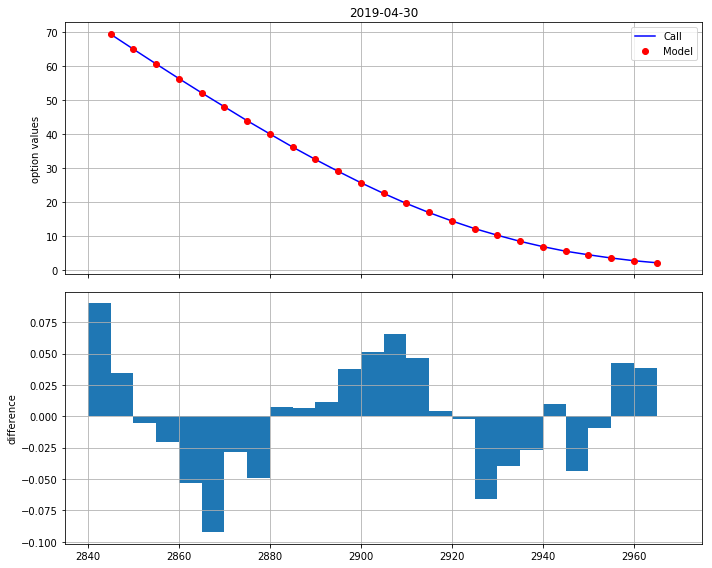

In [94]:
i = 0
min_RMSE = 100.

p0 = sop.brute(error_func, ((6, 10, 0.5), (100, 105, 0.5), (2, 3, 0.5)), finish=None)
print(p0)
opt = sop.fmin(error_func, p0, xtol=0.00001,
                ftol=0.00001, maxiter=750, maxfun=1500)
print(opt)
generate_plot(opt, filtData)

<br><br>
### <u>Extracted Density</u>

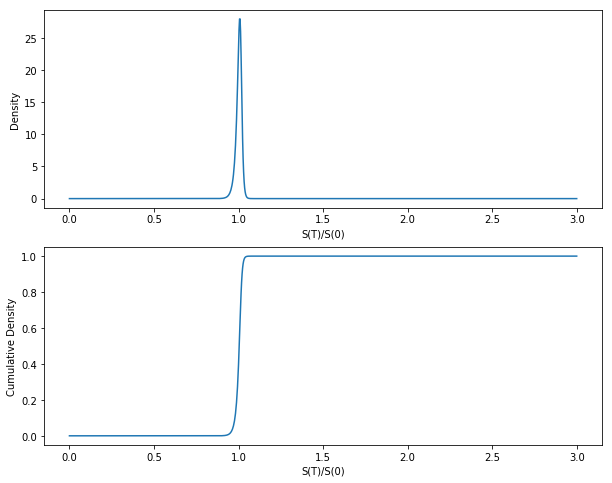

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(0, 3, 1000)
Q, B, nu = opt
cdf = 1/((1+Q*(np.exp(-B*(x-1))))**(1/nu))
pdf = (-1/nu)*((1+Q*np.exp(-B*(x-1)))**((-1/nu)-1))*(-Q*B)*np.exp(-B*(x-1))
plt.rcParams['figure.figsize'] = [10,8]

plt.subplot(211)
plt.plot(x,pdf);
plt.xlabel('S(T)/S(0)');
plt.ylabel('Density');

plt.subplot(212)
plt.plot(x,cdf);
plt.xlabel('S(T)/S(0)');
plt.ylabel('Cumulative Density');

### <u>Non-Parametric Model V/s Merton Jump Diffusion Model</u>

#### <u>Number of Parameters</u>
<i>Non-Parametric Method:</i> <b><u>3</u></b><br>
<i>Merton Jump Diffusion Model:</i> <b><u>4</u></b>

#### <u>Root Mean Squared Error</u>
<i>Non-Parametric Method:</i> <b><u>0.043487</u></b><br>
<i>Merton Jump Diffusion Model:</i> <b><u>2.537006</u></b>

#### <u>Computation Speed</u>
<i>Non-Parametric Method:</i> <b><u>0.00159 seconds</u></b><br>
<i>Merton Jump Diffusion Model (FFT):</i> <b><u>0.00747 seconds</u></b><br>
<i>Merton Jump Diffusion Model (INT):</i> <b><u>0.00904 seconds</u></b>

In [96]:
import time

times = np.zeros(1000)
for i in range(1000):
    t = time.time()
    find_call_value(2905.58, 2850, r, 15/365, opt)
    times[i] = time.time() - t
print(np.mean(times))

0.0015867235660552979
